<a href="https://colab.research.google.com/github/daniellaparada/PyE-TDS/blob/main/3_Simulaci%C3%B3n_de_variables_aleatorias_continuas_y_modelos_de_distribuci%C3%B3n_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de variables aleatorias continuas y modelos de distribución de probabilidad

En este *notebook* estudiaremos dos enfoques para el estudio de las variables aleatorias:

- Calcular probabilidades y distribuciones a mano, de forma exacta, usando la teoría de probabilidades que estudiamos y utilizando Python como "calculadora".

- Simular el experimento y/o las distribuciones y calcular y/o estimar las probabilidades a partir de la frecuencia relativa.

En el Trabajo de Simulación de esta semana, vamos a estudiar qué ocurre con un problema que alguna vez, casi con seguridad, nos tocó de cerca: ¡llenar un álbum de figuritas! E, incluso, vamos someter a prueba esa intuición que todos los que alguna vez coleccionamos figuritas tenemos: ¿hay figuritas difíciles?

## Densidad, distribución y cálculo de probabilidades con ``stats``

Para el caso de las variables continuas, ya no es tan fácil representar modelos aleatorios y calcular probabilidades "a mano" como lo hicimos en el caso continuo. Sin embargo, siempre vamos a poder definirlas y estudiarlas usando la librería ``stats``, como también vimos que era posible hacerlo en la posta anterior. Comencemos por estudiar la Uniforme, que es nuestro modelo "equiprobable" en el mundo continuo. Sin embargo, antes de empezar, conviene cargar módulos y librerías que usaremos a lo largo de este notebook.

In [ ]:
# Cargamos las librerías que ya estudiamos en el notebook 1
import numpy as np
import random as rd

# Pero vamos a usar algunas más...
# De scipy importamos stats para poder tener generadores de muestras provenientes
# de las variables aleatorias usuales (https://docs.scipy.org/doc/scipy/reference/stats.html)
from scipy import stats

# E importamos algunas más para poder hacer algunos gráficos útiles
import seaborn as sns
import matplotlib.pyplot as plt

# Fijamos una semilla para que todo sea reproducible
rd.seed(123)

# Y definimos unos parámetros estéticos de seaborn para que todo luzca mejor
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Para evitar que nos aparezcan resultados en notación científica
np.set_printoptions(suppress=True)

### Distribución Uniforme
Sea $X$ la variable aleatoria con distribución uniforme en el intervalo $(a,b)$. Es decir, $X\sim U(a,b)$. A lo largo de esta sección, vamos a revisar con Python aquellos que estudiamos en el Libro 3. En particular, para lo que sigue, vamos a estudiar $X\sim U(10,20)$.

#### Función de densidad

Recordemos qué es una función de densidad. Cuando estudiamos variables aleatorias discretas, teníamos funciones de probabilidad puntual que nos daban información de cómo era la probabilidad de esa variable para los diferentes valores de su rango. Es decir, la función de probabilidad puntual daba $$P(X=x), \text{ para todos los } x\in R_X.$$

En las continuas esto ya no tiene sentido, pues como $x$ toma valores en un **intervalo** de $\mathbb{R}$, ya no es posible discretizar, como ocurría con el rango de las discretas. Sin embargo, hay un nuevo sentido que desarrollar: ya no interesan los valores puntuales, sino la probabilidad en diferentes **regiones**, donde esté definida la variable continua.

Es decir, la **función de densidad**, en algún sentido, nos da información de cómo son las probabilidades de la variable continua en diferentes **regiones** en donde sea interesante calcularlas.

Entonces, una variable aleatorias continua $X$, entonces, tiene función de densidad $f_X(x)$ que debe cumplir que:

- $f_X(x)$ sea positiva o a lo sumo $0$ para todo $x\in \mathbb{R}$. En particular, interesan especialmente las regiones en donde $f_X(x)$ sea positiva. A esas regiones se las conoce como **soporte de la densidad**. Por ejemplo, si $X\sim U(10,20)$, el soporte de su densidad está dado por el intervalo $(10,20)$, ya que fuera de él, la densidad valdrá $0$.

- el área bajo la curva $f_X(x)$ en todo $\mathbb{R}$ debe ser $1$.

Justamente, el área bajo la curva $f_X(x)$ será lo que nos permita calcular probabilidades para regiones de interés de la variable $X$. Ya llegaremos a eso un poco más adelante. Por ahora, estudiemos la densidad de una variable aleatoria $X\sim U(10,20)$ usando Python.

In [ ]:
# Definimos los extremos del intervalo de la uniforme
a = 10
b = 20

# Longitud del intervalo
l = b-a

# Para definir la uniforme, recordemos que ya no tendremos fpp sino densidad
# Por eso, necesitamos armar una grilla de x en la que evaluaremos la densidad
# y/o la dsitribución acumulada para el cálculo de probabilidades
# Armemos un rango que de x en el intervalo (a-5,b+5) con puntos cada 0.1
x = np.arange(a-5, b+5, 0.1)

# Calculemos la densidad en los puntos del rango. Para su densidad, usamos pdf
# ¡Cuidado! La uniforme del paquete stat tiene como parámetros:
# el extremo inferior (a)
# su longitud (l)
# NO tiene como parámetros (a,b) sino (a,b-a)

fx = stats.uniform.pdf(x, a, l)
fx

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

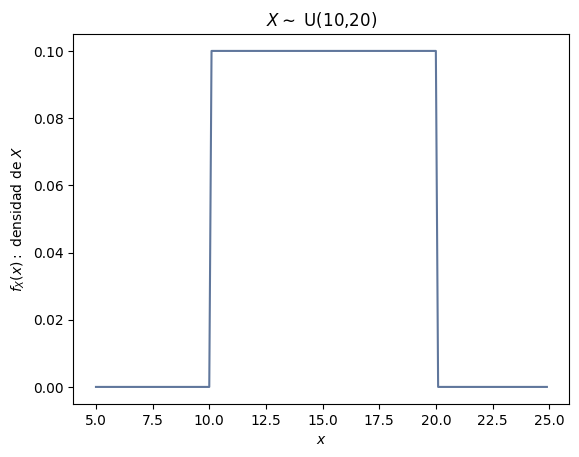

In [ ]:
# Hacemos un gráfico de la densidad, vamos a usar la librería matplotlib que importamos como plt
# Este código genera un gráfico para los puntos (x,fX)
plt.plot(x, fx)

# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$f_X(x):$ densidad de $X$')
plt.title(f"$X \sim$ U(%.0f,%.0f)" % (a,b));
# Usamos ; al final para pedir que muestre el gráfico
# También podríamos usar plt.show()

En efecto, vemos un gráfico aproximado de la densidad. Aproximado en tanto sabemos que las líneas verticales del gráfico en $x=10$ y en $x=20$ no forman parte de la gráfica de la densidad, sino que es una limitación de la representación gráfica que estamos usando. Es decir, esas líneas verticales no son puntos de la densidad de $X$, sino que deberían ser líneas punteadas, pues:
- la densidad de $X$ vale $1$ sobre la longitud del intervalo para $x\in(10,20)$, es decir, la densidad allí es constante e igual a $\frac{1}{10}$,
- la densidad de $X$ vale $0$ para $x\notin(10,20)$, es decir, la densidad es constante e igual a $0$ para cualquier $x$ fuera del intervalo $(10,20)$.

#### Función de distribución acumulada

Grafiquemos la función de distribución acumulada (FDA) de $X$.

Recordemos la función de distribución acumulada de una variable aleatoria (¡continua o discreta!) es la función que, para cada valor de $x$ real, calcula la probabilidad acumulada por la variable aleatoria hasta ese valor. Es decir, $F_X(x)=P(X\leq x)$ para todo $x\in \mathbb{R}$.

En el caso de las discretas, la FDA resulta siempre discontinua, es decir, "pega saltos" y eso se debe a que la probabilidad es positiva en valores discretos, puntuales; en particular, en todos aquellos del rango de $X$. Por lo tanto, se acumula la misma probabilidad hasta que, eventualmente, se agrega una nueva probabilidad positiva en el rango de $X$, entonces, la FDA "pega un salto", pues agrega esa probabilidad a las que ya tenía acumuladas.

En el caso de las continuas, ya vimos que la probabilidad puntual es siempre $0$, pero lo que nos interesa es ver cómo se distribuye o acumula la probabilidad en **interavalos** de la variable aleatoria donde la densidad es positiva.

En el caso de la Uniforme que definimos arriba, sabemos que:
- la FDA vale $0$ para todo $x\in(-\infty,10)$, es decir, no tenemos nada acumulado mientras la densidad siga valiendo 0,
- la FDA vale empieza a acumular probabilidades para todo $x\in(10,20)$ y, más aún, en el caso de una Uniforme, siempre acumula la misma probabilidad para un rango de igual longitud, es decir, la probabilidad que se acumula en el intervalo $(10,11)$ es la misma que la que se acumula en el intervalo $(11,12)$, por poner un ejemplo,
- la FDA vale $1$ para todo $x\in(20,+\infty)$, es decir, ya acumulamos toda la probabilidad posible una vez que nos vamos fuera del soporte de la densidad.

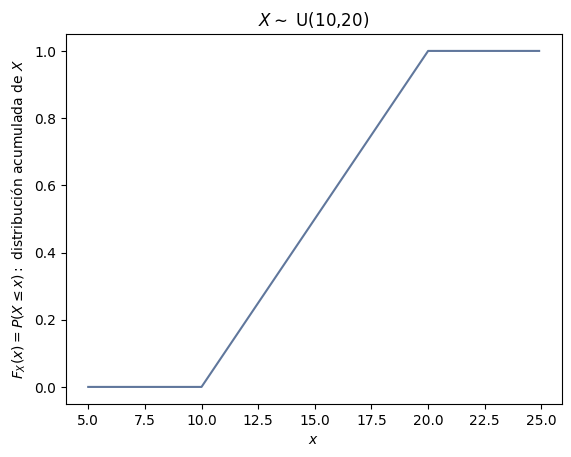

In [ ]:
# Calculemos la FDA en los puntos del rango. Para su densidad, usamos cdf
Fx = stats.uniform.cdf(x, a, l)

plt.plot(x, Fx)
# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$F_X(x)=P(X\leq x):$ distribución acumulada de $X$')
plt.title(f"$X \sim$ U(%.0f,%.0f)" % (a,b));

#### Cálculo de probabilidades

De lo que estudiamos en esta posta, ya sabemos que calcular probabilidades en el caso de las variables continuas implica **calcular áreas** bajo la función de densidad.

El caso de la Uniforme es el más sencillo de todos, porque calcular áreas bajo la función de densidad es calcular áreas de rectángulos, ¡algo que sabemos y podemos hacer sin problemas!

En el apartado anterior decíamos que la probabilidad que se acumula en el intervalo $(10,11)$ es la misma que la que se acumula en el intervalo $(11,12)$. Es decir:
$$P(10\leq X \leq 11)=P(11\leq X \leq 12).$$

Veamos que calcular $P(10\leq X \leq 11)$ es igual a calcular el área bajo la densidad en el intervalo $(10,11)$. Pero como la densidad allí es constante e igual a $1/10$, eso equivale a calcular el área de un rectángulo de altura $1/10$ y base $1$. Es decir:
$$P(10\leq X \leq 11)=1\cdot \frac{1}{10}=\frac{1}{10}.$$

Pero lo mismo ocurre si queremos calcular $P(11\leq X \leq 12)$, pues eso equivale a calcular el área de un rectángulo de altura $1/10$ y base $1$. Es decir:
$$P(11\leq X \leq 12)=1\cdot \frac{1}{10}=\frac{1}{10}.$$

Y esto es así, porque la longitud de la base es la misma para el caso de $X$ entre $10$ y $11$ que para el caso entre $11$ y $12$. Es más, ¡esta probabilidad será $1/10$ para cualquier intervalo de longitud $1$ que tomemos y que resulte completamente contenido en $(10,20)$.

Antes de mostrar estos resultados en el código, recordemos que en el caso de las variables aleatorias continuas, calcular la probabilidad entre dos valores dados equivale a restar el valor de sus densidades acumuladas en ellos. Es decir:
$$P(x_1 \leq X \leq x_2) = F_X(x_2)-F_X(x_1).$$

In [ ]:
x1 = 10
x2 = 11

Fx1 = stats.uniform.cdf(x1, a, l)
Fx2 = stats.uniform.cdf(x2, a, l)

Fx2 - Fx1

0.1

In [ ]:
x1 = 11
x2 = 12

Fx1 = stats.uniform.cdf(x1, a, l)
Fx2 = stats.uniform.cdf(x2, a, l)

Fx2 - Fx1

0.1

Calculá la siguiente probabilidad, "a mano" y verificá que da lo mismo que en Python.

$$P(9.13\leq X \leq 12.81)$$

In [ ]:
x1 = 9.13
x2 = 12.81

Fx1 = stats.uniform.cdf(x1, a, l)
Fx2 = stats.uniform.cdf(x2, a, l)

Fx2 - Fx1

0.281

#### Esperanza y varianza

Sea la variable aleatoria $X\sim U(a,b)$. Sabemos que su esperanza y varianza están dadas por
$$E(X)=\frac{a+b}{2}, \quad V(X)=\frac{(b-a)^2}{12}.$$

Calculemos la esperanza y la varianza de la variable que venimos usando con Python. Verificá que los resultados coinciden con los obtenidos "a mano" para la variable $X$ estudiada.

In [ ]:
# La definimos
uniforme = stats.uniform(a, l)

# Obtenemos sus momentos
esperanza, varianza = uniforme.stats(moments='mv')
print(esperanza)
print(varianza)

15.0
8.333333333333332


#### [¡YAPA!] Muestras de una distribución uniforme

Antes de replicar este ejemplo para algunas de las otras distribuciones que estudiamos, podemos ver cómo generar muestras o datos provenientes de una distribución dada, en este caso, de la que venimos estudiando: $X\sim U(10,20)$.

In [ ]:
# Fijamos una semilla para que el resultado sea reproducible
rd.seed(123)

# Definimos la cantidad n de datos que queremos generar
n = 10

# Usamos el comando rvs para generar la muestra
muestra = stats.uniform.rvs(a, l, n)
muestra

array([17.39374024, 13.32348222, 12.40684474, 15.87164819, 10.9283891 ,
       16.79774588, 12.7809144 , 12.66747306, 18.9484732 , 15.12821428])

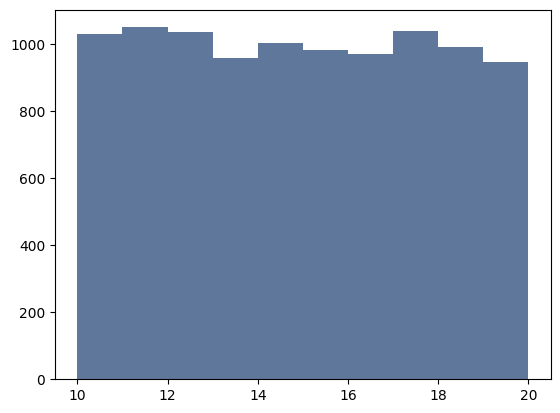

In [ ]:
# Repetimos para un tamaño de muestra de 10000
# Y hacemos un histograma para ver cómo se distribuyen los valores de la muestra
# Si todo funciona bien, deberíamos ver algo parecido a la densidad, en cuanto su forma.
n = 10000
muestra = stats.uniform.rvs(a, l, n)
plt.hist(muestra);

Para lo que sigue, replicaremos este estudio que hicimos en el caso uniforme, pero para otras variables aleatorias continuas de las que estudiamos en el Libro 3.

### Distribución normal
Sea $X$ la variable aleatoria normal con esperanza $\mu$ y varianza $\sigma^2$. Es decir $X\sim N(\mu,\sigma^2)$. Repliquemos el estudio que hicimos con la uniforme, pero adaptado al caso normal.

En particular, estudiaremos con Python la variable aleatoria $X\sim N(170,5^2)$, que bien podría estar representado el siguiente fenómeno:

$$X: \text{ altura (en centímetros) de las personas de Argentina}.$$

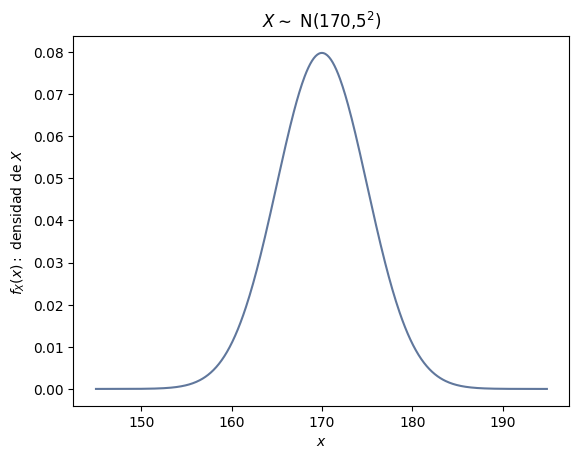

In [ ]:
# Definimos los parámetros de la normal
mu = 170
sigma = 5

# Para definir la uniforme, recordemos que ya no tendremos fpp sino densidad
# Por eso, necesitamos armar una grilla de x en la que evaluaremos la densidad
# y/o la dsitribución acumulada para el cálculo de probabilidades
# Armemos un rango que de x en el intervalo (mu-5*sigma,mu+5*sigma) con puntos cada 0.1
x = np.arange(mu-5*sigma, mu+5*sigma, 0.1)

# Calculemos la densidad en los puntos del rango. Para su densidad, usamos pdf
# ¡Cuidado! La normal del paquete stat tiene como parámetros:
# la esperanza (mu)
# el desvío (no sigma cuadrado sino sigma)
# NO tiene como parámetros (mu,sigma^2) sino (mu,sigma)

fx = stats.norm.pdf(x, mu, sigma)

# Este código genera un gráfico para los puntos (x,fX)
plt.plot(x, fx)

# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$f_X(x):$ densidad de $X$')
plt.title(f"$X \sim$ N(%.0f,$%.0f^2$)" % (mu,sigma));

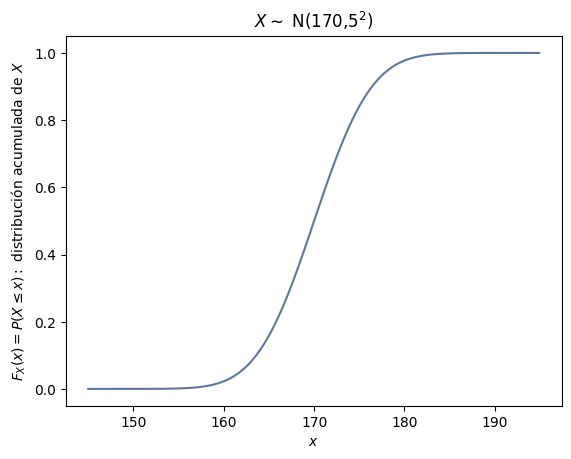

In [ ]:
# Calculemos la FDA en los puntos del rango. Para su densidad, usamos cdf
Fx = stats.norm.cdf(x, mu, sigma)

plt.plot(x, Fx)
# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$F_X(x)=P(X\leq x):$ distribución acumulada de $X$')
plt.title(f"$X \sim$ N(%.0f,$%.0f^2$)" % (mu,sigma));

Calculemos, por ejemplo, la probabilidad de que una persona de esta población elegida al azar, tenga una altura de entre 160 y 165 centímetros. Es decir, $P(160\leq X \leq 165)$.

In [ ]:
x1 = 160
x2 = 165

Fx1 = stats.norm.cdf(x1, mu, sigma)
Fx2 = stats.norm.cdf(x2, mu, sigma)

Fx2 - Fx1

0.13590512198327787

Podemos, también, calcular cuál es la probabilidad de que mida menos de un metro ochenta, es decir, $P(X \leq 180)$.

In [ ]:
x1 = 180

Fx1 = stats.norm.cdf(x1, mu, sigma)

Fx1

0.9772498680518208

Calculemos la esperanza y la varianza de la variable $X$ con Python.

In [ ]:
# La definimos
normal = stats.norm(mu, sigma)

# Obtenemos sus momentos
esperanza, varianza = normal.stats(moments='mv')
print(esperanza)
print(varianza)

170.0
25.0


Por último, generemos una muestra como si hiciéramos el experimento de evaluar las alturas de $1000$ personas de esta población.

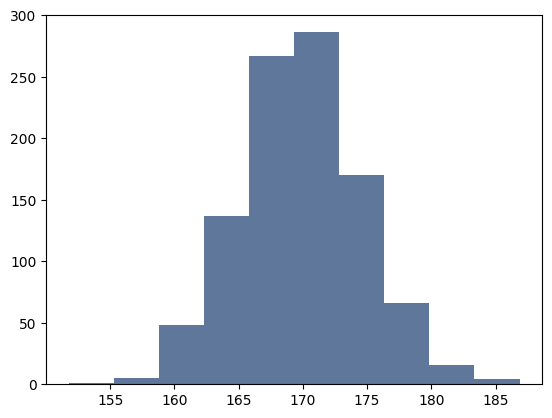

In [ ]:
rd.seed(123)
n = 1000
muestra = stats.norm.rvs(mu, sigma, n)
plt.hist(muestra);

#### La estandarización

Ya estudiamos en el Libro 3, que cualquier variable aleatoria $X\sim N(\mu,\sigma^2)$ cumple la propiedad de poder ser "llevada" a una normal estándar, es decir, aquella con media $0$ y varianza $1$.

Es decir, si $X\sim N(\mu,\sigma^2)$, la variable aleatoria
$$Z=\frac{X-\mu}{\sigma}$$
tiene distribución $N(0,1)$.

Al proceso de construir la variable $Z$ a partir de $X$ se lo conoce como **estandarización** de la variable aleatoria.

Ya vimos que la probabilidad de que una persona de esta población elegida al azar, tenga una altura de entre 160 y 165 centímetros era aproximadamente $0.1359$. Es decir, $P(160\leq X \leq 165)\approx 0.1359$.

Como la estandarización vale, calcular esa probabilidad daría lo mismo que haber calculado
$$
\begin{aligned}
P(160\leq X \leq 165)&=P\left(\frac{160-\mu}{\sigma}\leq \frac{X-\mu}{\sigma} \leq \frac{165-\mu}{\sigma}\right)\\
&=P\left(\frac{160-170}{5}\leq \frac{X-170}{5} \leq \frac{165-170}{5}\right)\\
&=P\left(-2 \leq Z \leq -1\right)\\
&=F_Z(-1)-F_Z(-2).\\
\end{aligned}
$$

Calculemos con Python esa probabilidad, pero usando $Z$ y no $X$; y verifiquemos que da lo que corresponde.

In [ ]:
z1 = -2
z2 = -1

Fz1 = stats.norm.cdf(z1, 0, 1)
Fz2 = stats.norm.cdf(z2, 0, 1)

Fz2 - Fz1

0.13590512198327787

El resultado anterior es, incluso, más general.

Dada cualquier variable aleatoria continua $X$ con $E(X)=\mu$ y $V(X)=\sigma^2$, siempre es posible definir una nueva variable aleatoria $Z$ que resulte de estandarizar, es decir,
$$Z=\frac{X-\mu}{\sigma}$$
y que cumple con las siguientes características:
- $E(Z)=0$,
- $V(Z)=1$.

En el caso normal sí ocurre algo que no siempre ocurre con otras distribuciones: la distribución de $Z$ también es normal.

### Distribución Exponencial

Sea $X$ la variable aleatoria con distribución exponencial de parámetro $\lambda$. Es decir $X\sim Exp(\lambda)$. Repliquemos el estudio que hicimos con la uniforme y la normal, pero adaptado al caso exponencial.

En particular, estudiaremos con Python la variable aleatoria $X\sim Exp(0.9)$, que bien podría estar representado el siguiente fenómeno:

$$X: \text{ tiempo (en minutos) que transcurre entre la llegada de automóvil y el siguiente a una caseta de peaje de una ruta}.$$

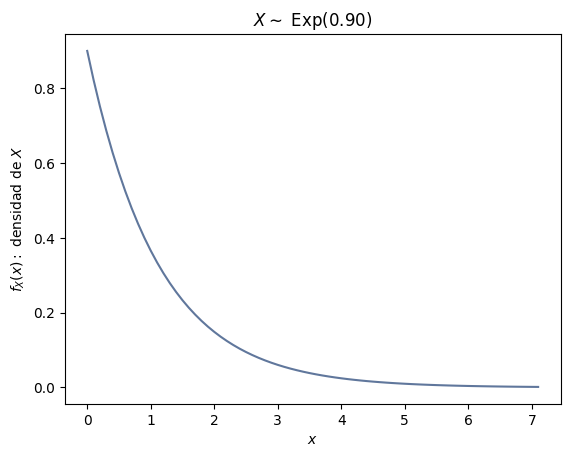

In [ ]:
# Definimos los parámetros de la exponencial
lamb = 0.9

# Para definir la uniforme, recordemos que ya no tendremos fpp sino densidad
# Por eso, necesitamos armar una grilla de x en la que evaluaremos la densidad
# y/o la dsitribución acumulada para el cálculo de probabilidades
# Armemos un rango que de x en el intervalo (0,8*lambda) con puntos cada 0.1
x = np.arange(0, 8*lamb, 0.1)

# Calculemos la densidad en los puntos del rango. Para su densidad, usamos pdf
# ¡Cuidado! La exponencial del paquete stat tiene como parámetros:
# 0 (el mínimo valor del soporte, siempre es 0)
# 1/lambda (1/lamb)
# NO tiene como parámetros (lambda) sino (0,1/lambda)
fx = stats.expon.pdf(x, 0, 1/lamb)

# Este código genera un gráfico para los puntos (x,fX)
plt.plot(x, fx)

# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$f_X(x):$ densidad de $X$')
plt.title(f"$X \sim$ Exp(%.2f)" % (lamb));

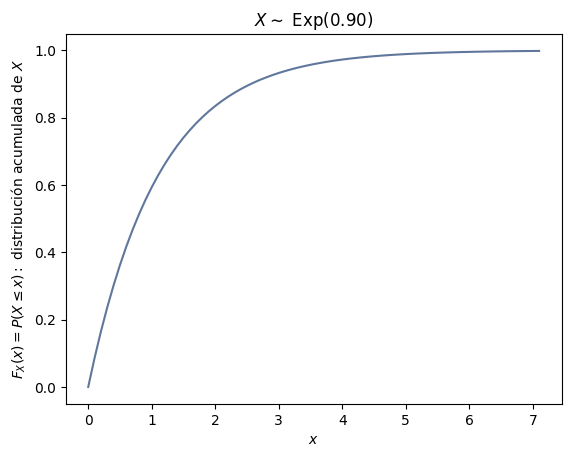

In [ ]:
# Calculemos la FDA en los puntos del rango. Para su densidad, usamos cdf
Fx = stats.expon.cdf(x, 0, 1/lamb)

plt.plot(x, Fx)
# Estos son parámetros estéticos, a gusto
plt.xlabel('$x$')
plt.ylabel('$F_X(x)=P(X\leq x):$ distribución acumulada de $X$')
plt.title(f"$X \sim$ Exp(%.2f)" % (lamb));

Calculemos, por ejemplo, la probabilidad de que el tiempo transcurrido sea inferior a $2$ minutos. Es decir, $P(X\leq 2)$.

In [ ]:
x1 = 2

Fx1 = stats.expon.cdf(x1, 0, 1/lamb)

Fx1

0.8347011117784134

Sea la variable aleatoria $X\sim Exp(\lambda)$. Sabemos que su esperanza y varianza están dadas por
$$E(X)=\frac{1}{\lambda}, \quad V(X)=\frac{1}{\lambda^2}.$$

Calculemos la esperanza y la varianza de la variable que venimos usando con Python. Verificá que los resultados coinciden con los obtenidos "a mano" para la variable $X\sim Exp(0.9)$ estudiada.

In [ ]:
# La definimos
exponencial = stats.expon(0, 1/lamb)

# Obtenemos sus momentos
esperanza, varianza = exponencial.stats(moments='mv')
print(esperanza)
print(varianza)

1.1111111111111112
1.234567901234568


## [¡YAPA!] Relación de la Exponencial con el Proceso de Poisson

Como estudiamos en el Libro 3, los tiempos de espera entre eventos consecutivos de una distribución Poisson se distribuyen como una variable aleatoria Exponencial.

En nuestro caso, estuvimos estudiando $X\sim Exp(\lambda=0.9)$ como la variable que está representado el siguiente fenómeno:

$$X: \text{ tiempo (en minutos) que transcurre entre la llegada de automóvil y el siguiente a una caseta de peaje de una ruta}.$$

Sea $Y$ la variable aleatoria Poisson con parámetro de intensidad $1/\lambda$, usando el $\lambda=0.9$ de la exponencial.

Es decir $Y\sim Poi(1/\lambda=10/9), \text{ con } R_Y=\mathbb{N}_0$. Más precisamente, esta variable aleatoria $Y$ estará modelando el experimento aleatorio

$$Y: \text{ cantidad de vehículos que llegan por minuto a la caseta de peaje de la ruta del ejemplo}.$$

En este último apartado, vamos a generar una muestra como si hiciéramos el experimento de evaluar $1000$ tiempos de espera $X$ entre que pasa un auto y otro en esta caseta de peaje. Es decir, en esta simulación habrán pasado $1000$ autos y registramos, en cada caso, el tiempo de espera entre que pasó uno y pasó el siguiente.

Y lo que vamos a querer hacer es **verificar empíricamente** que los tiempos de espera $X$ observados podrían provenir de pensar que la llegada de los autos a la caseta por minuto, $Y$, vienen de una distribución Poisson como la propuesta según lo que sugiere la teoría estudiada.

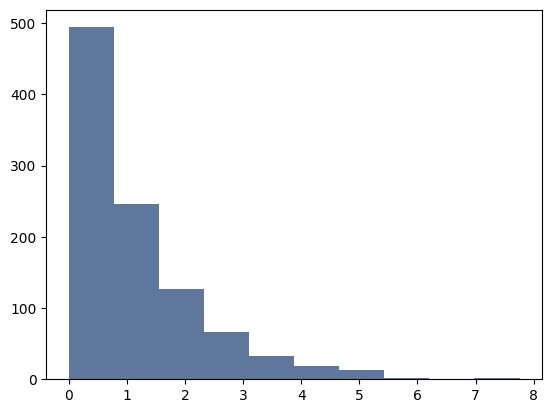

In [ ]:
# Generemos una muestra para X
n = 1000
rd.seed(123)
muestra = stats.expon.rvs(0, 1/lamb, n)
plt.hist(muestra);

In [ ]:
muestra[0:10]

array([0.07423686, 1.50625017, 0.14966027, 1.67274763, 1.11164796,
       2.27290899, 0.46097775, 0.73783946, 0.25124726, 0.14177369])

Viendo los primeros 10 elementos de la muestra, tenemos una muestra de 10 tiempos transcurridos, en minutos, entre la llegada de 10 autos a la caseta de peaje de esa ruta.

Como lo que simulamos es $X$, el "tiempo entre arribos", si queremos conocer el minuto en el que ingresó un determinado auto al peaje, necesitamos conocer el tiempo acumulado.

Para explorar lo que sigue, vamos a crear un vector lleno de ceros que va a contener los tiempos acumulados en cada iteración de la simulación de nuestra muestra.

In [ ]:
# Creamos un vector de ceros:
t_acumulado = np.zeros(n)

# Cargamos el primer valor como el primer sampleo de tiempos:
t_acumulado[0] = muestra[0]

# Luego, comenzamos a llenar el vector con los valores acumulados.
for j in range(1, len(muestra)):
    t_acumulado[j] = muestra[j] + t_acumulado[j-1]

t_acumulado[0:20]

array([ 0.07423686,  1.58048702,  1.7301473 ,  3.40289493,  4.51454289,
        6.78745188,  7.24842963,  7.98626909,  8.23751635,  8.37929004,
        9.72252943, 10.41604614, 12.88926611, 13.03671644, 15.53401286,
       17.96319798, 19.68302163, 20.67646604, 22.43077264, 22.55669979])

En lo anterior vemos los 20 primeros tiempos acumulados. Lo que haremos ahora, será usar esa información para calcular cuántos arribos hubo por minuto, que es lo que nos permitirá armar una muestra de algo que supuestamente se distribuye como $Y$.

Dado que en el vector de tiempos acumulados conocemos para cada vehículo ingresado su tiempo absoluto de arribo, solamente necesitamos clasificarlos según su minuto de llegada.

Vamos a crear un vector, en el cual cada índice represente un minuto de llegada. Por ejemplo, el índice 0, serán los autos que llegaron a la caseta de peaje desed el minuto 0 al minuto 1. El último minuto acumulado es el que vemos a continuación.

In [ ]:
t_acumulado[-1]

1143.4191404321682

In [ ]:
# Creamos un vector donde cada índice representa el minuto de llegada.
ult_min = t_acumulado[-1]
minutos = int(ult_min)
arribos_minutos = np.zeros(minutos + 1).astype(int)

for i in range(0, len(muestra)):
    # Extraemos el valor acumulado en el arribo i:
    m = t_acumulado[i]

    # Sacamos la parte entera, para saber a qué minuto pertenece:
    m_i = int(m)

    # Buscamos el índice correspondiente a ese minuto y le sumamos 1.
    arribos_minutos[m_i] = arribos_minutos[m_i] + 1

arribos_minutos[0:20]

array([1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

Si todo funciona como la teoría sugiere, en ``arribos_minutos`` deberíamos obtener una muestra de $1000$ observaciones de una variable

$$Y: \text{ cantidad de vehículos que llegan por minuto a la caseta de peaje de la ruta del ejemplo}$$

tal que $Y\sim Poi(1/\lambda=10/9)$.

Para ver si, en efecto, esto es así, hagamos algunos gráficos. Para comenzar, veamos la cantidad de arribos que hubo durante la primera hora.

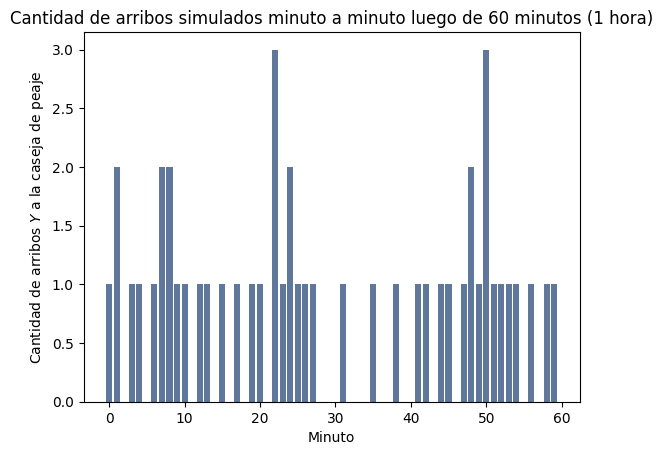

In [ ]:
# Graficamos
minutos = 60

# Gráfico de barras
plt.bar(range(0, minutos), arribos_minutos[0:minutos])

# Parámetros estéticos
plt.title(f'Cantidad de arribos simulados minuto a minuto luego de {minutos} minutos (1 hora)')
plt.ylabel('Cantidad de arribos $Y$ a la caseja de peaje')
plt.xlabel('Minuto');

Veamos, también, que lo observado empíricamente en la muestra de tiempos se parece, en efecto, a la distrubución de la exponencial con la que simulamos.

Para evaluar gráficamente esta aproximación entre lo observado en la muestra y la densidad teórica, necesitamos un histograma de densidad. Si bien es algo que estudiaremos en la última posta de la materia, por ahora basta con indicar ``density=True`` al hacer el histograma.

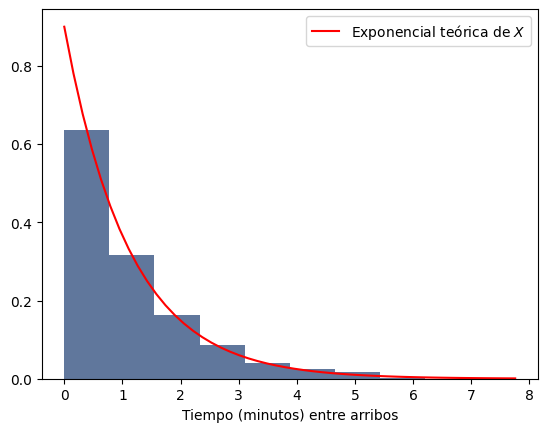

In [ ]:
# Densidad exponencial teórica de $X$
xvals = np.linspace(0, np.max(muestra))
yvals = stats.expon.pdf(xvals, 0, 1/lamb)

plt.plot(xvals, yvals, c='r', label='Exponencial teórica de $X$')
plt.legend()

# Histograma normalizado de tiempos observados
plt.hist(muestra, density=True)
plt.xlabel('Tiempo (minutos) entre arribos');

¡Ahora sí, el gráfico que necesitamos! Como sabemos que la relación entre los tiempos de espera de eventos consecutivos en una Poisson sigue una distribución exponencial, deberíamos poder ver que los arribos simulados a partir los tiempos muestreados con $X$ siguen la distribución Poisson que supusimos para $Y$. **¡Comprobémoslo!**

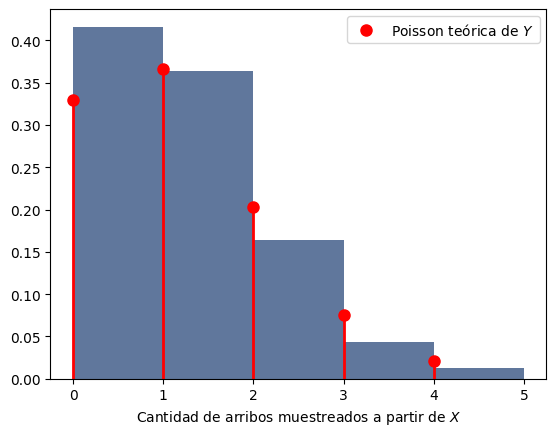

In [ ]:
# Histograma de densidad de los arribos construidos a partir de X
plt.hist(arribos_minutos, density=True, bins=np.max(arribos_minutos))

# Función de probabilidad puntual de la poisson teórica Y
xvals = range(0, np.max(arribos_minutos))
yvals = stats.poisson.pmf(xvals, 1/lamb,0)
plt.plot(xvals, yvals, 'ro', ms=8, mec='r', label='Poisson teórica de $Y$')
plt.legend()
plt.vlines(xvals, 0, yvals, colors='r', linestyles='-', lw=2)
plt.xlabel('Cantidad de arribos muestreados a partir de $X$');

# Trabajo de simulación 2
Para el segundo trabajo de simulación, vamos a estudiar un problema clásico: el _coupon collector's problem_. Para entrar en tema, te invitamos a leer [esta noticia](https://www.rionegro.com.ar/servicios/un-matematico-argentino-revela-como-hacer-para-llenar-el-album-del-mundial-qatar-2022-y-sorprende-2463133/).

El problema del _coupon collector_, en realidad, tiene una formulación equivalente pero mucho más interesante: imaginemos que queremos llenar un álbum de figuritas (¡el del Mundial 2022!, que luego de haber salido campeones es **ideal** para coleccionar, ¿no?), ¿cuántos paquetes, en promedio, necesitamos comprar para conseguirlo?

![picture](https://drive.google.com/uc?export=view?&id=1dBOv8mz-ZYT9XmYsAHr181ow1RVsHKNS)

## Resolución "a mano"

Para comenzar la resolución "a mano", hagamos algunos supuestos:

- tenemos un álbum con $n$ figuritas distintas,
- los paquetes traen una figurita,
- cada figurita se imprime en cantidades iguales y se distribuye aleatoriamente en los paquetes.

Estos supuestos nos permitirán **simplificar la matemática necesaria para abordar el problema**.

La simplificación más extrema es, quizás, la de que los paquetes traen una única figurita: sabemos que esto no es así, por lo general traen 5. Sin embargo, los fabricantes de figuritas como Panini aseguran que cada figurita se imprime en cantidades iguales y se distribuye aleatoriamente en los paquetes. Hasta hace unos años, tal distribución era aleatoria y, por lo tanto, en cada paquete existía la posibilidad de que hubiera figuritas repetidas (¡imaginate que te toquen dos figuritas de Messi en un mismo sobre!).

Sin embargo, en la actualidad, empresas como Panini aseguran que esta posibilidad ya no existe: los paquetes son preparados de forma tal de no incluir figuritas repetidas. Esto, entonces, hace que nuestro supuesto de que cada paquete trae una única figurita, no sea tan distante de la realidad.

**¡Manos a la obra!**

Llamemos $T_i$ a la variable aleatoria que cuenta la cantidad de paquetes que son necesarios comprar para obtener la $i$-ésima figurita después de que se tienen $i-1$ figuritas pegadas en el álbum.

Así, $T_1$ es la variable aleatoria que cuenta la cantidad de paquetes que son necesarios comprar para obtener la primera figurita después de que se tienen $0$ figuritas pegadas en el álbum. ¡El inicio de nuestra colección! ¿Pero, qué valor toma $T_1$? ¡$1$! Pues, con seguridad, el primer paquete que abramos tendrá una figurita nueva, ¡ya que no tenemos ninguna pegada! Es una variable aleatoria que, en realidad, es constante: vale $1$ con probabilidad $1$. Pero las demás no serán así...

Veamos que $T_2$ es la variable aleatoria que cuenta la cantidad de paquetes que son necesarios comprar para obtener la segunda figurita después de que se tiene $1$ figurita pegadas en el álbum. ¿Qué valor toma $T_2$? ¡Esto ya no podemos saberlo con seguridad! Pues puede ser que el siguiente paquete que compremos vuelva a tener la figurita que ya pegamos, entonces $T_2$ podrá tomar valores naturales:
- puede tomar el valor $1$, si es que justo abrimos un paquete que tiene una figurita nueva,
- puede tomar el valor $2$, si es que justo abrimos un paquete que tiene una la figurita que ya tenemos y recién en el segundo paquete tenemos una nueva,
- puede tomar el valor $3$, si es que justo abrimos los dos primeros paquetes que tiene la misma figurita que ya tenemos y recién en el tercer paquete tenemos una nueva,
- y así, sucesivamente.

¡Notemos que $T_2$ podría tomar el valor $1000$ si JUSTO los $999$ paquetes que abramos a continuación tuvieran, TODOS, la misma figurita que ya pegamos! (¡QUÉ MALA SUERTE!) Claro, todos estamos de acuerdo en que esto sería un evento poco probable, pero posible.

La pregunta que debemos hacernos es ¿cómo se distribuye $T_2$? Cada vez que abrimos un nuevo paquete estamos frente a un ensayo Bernoulli con dos posibles resultados: o el paquete que abrimos tiene una figurita que es nueva para nosotros, o no. Pero, ¿con qué probabilidad ocurre esto? Para $T_2$ notemos que ya pegamos una figurita en el álbum: es decir, hay $n-1$ figuritas que podrían servirnos de las $n$ disponibles. Luego, $p_2=\frac{n-1}{n}$. Así, la distribución de $T_2$ es geométrica de parámetro $p_2$ pues $T_2$ cuenta la cantidad de repeticiones de un ensayo Bernoulli (abrir un paquete) con probabilidad de éxito $p_2$.

Esto, en general, ocurrirá con todas las $T_i$. Es decir, $T_i$ tendrá distribución geométrica con $p_i=\frac{n-(i-1)}{n}=\frac{n-i+1}{n}$.

¿Y esto para qué nos sirve? Notemos que $T_n$ sería la variable aleatoria que cuenta la cantidad de paquetes que necesitamos abrir para pegar la figurita $n$ cuando ya pegamos $n-1$ en el álbum, es decir, $T_n$ cuenta la cantidad de paquetes que necesitamos abrir para pegar la última figurita. Por lo que vimos,

$$
T_n \sim Geom(p_n=1/n)
$$

es decir, la probabilidad de éxito para $T_n$ ¡es la menor de todas! Pues de las $n$ posibles figuritas que pueden tocarnos, ¡hay solo una que nos sirve!

Entonces, ¿cuántos paquetes esperamos comprar hasta conseguir esa última que nos permita completar el álbum? Acá nos estamos preguntando por la esperanza de $T_n$ y, como sabemos, esa esperanza es

$$
E(T_n)=\frac{1}{p_n}=\frac{1}{\frac{1}{n}}=n.
$$

Es decir, ¡necesitamos, en promedio, $n$ paquetes hasta conseguir la última figurita!

Esto da cuenta de que no hay figuritas "díficiles" necesariamente, sino que la dificultad es percibida precisamente porque necesitamos de muchas repeticiones para lograr el último éxito, la última figurita (¡sin importar qué figurita sea, de hecho!).

Ahora bien, esos $n$ paquetes que esperamos comprar, en promedio, son para conseguir la última figurita del álbum. Pero, ¿en total, cuántos paquetes creemos que serán necesarios comprar para llenar el álbum?

Para responder esto último, consideremos la variable aleatoria $T$ que cuenta el número de paquetes que son necesarios para coleccionar las $n$ figuritas del álbum. Por cómo construimos el planteo, es fácil ver que $T$ es la suma de todas las $T_i$. Es decir,
$$T=T_1+T_2+\cdots+T_n.$$

Lo que queremos estudiar es la esperanza de $T$, pues eso nos daría la cantidad, en promedio, que esperaríamos comprar para llenar el álbum. Pero esto es fácil de responder, pues vale la linealidad de la esperanza, es decir,

$$
\begin{aligned}
E(T) & =E\left(T_1+T_2+\cdots+T_n\right) \\
& =E\left(T_1\right)+E\left(T_2\right)+\cdots+E\left(T_n\right) \\
& =\frac{1}{p_1}+\frac{1}{p_2}+\cdots+\frac{1}{p_n} \\
& =\frac{n}{n}+\frac{n}{n-1}+\cdots+\frac{n}{1} \\
& =n \cdot\left(\frac{1}{1}+\frac{1}{2}+\cdots+\frac{1}{n}\right)
\end{aligned}
$$

¡Listo! Ya sabemos cuánto vale la esperanza para cada posible valor de $n$. Es decir, decime cuántas figuritas tiene tu álbum y yo puedo responderte cuál es la cantidad esperada de paquetes que vas a necesitar comprar para poder completarlo (¡siempre y cuando no intercambies con nadie, je!).

Ahora sí, calculémosla para $n=860$, que es la cantidad de figuritas del álbum del Mundial Qatar 2022.

In [ ]:
n = 860
def esperanza(n):
  e = 0
  for i in range(1,n+1):
    e = e + n/(n-i+1)
  return (e)
esperanza(n)

6307.867229669

Para el álbum del Mundial Qatar 2022, entonces, necesitaríamos cerca de $6308$ paquetes, ¡pero cuidado! nuestros paquetes "simplificados" tenían solo 1 figurita.

Ahora bien, si suponemos (por lo que afirma Panini) que en un paquete de 5 figuritas no vienen repetidas, entonces, comprar 1 paquete de 5 sería como comprar 5 paquetes de 1. Por lo tanto, una respuesta aproximada al contexto más realista que nos proponíamos estudiar sería...

In [ ]:
esperanza(n)/5

1261.5734459338

**¡Casi $1261$ paquetes!** Bueno, ahora que ya resolvimos el problema "a mano" y tenemos idea de cuál es la solución, te proponemos simularla y ver si, en efecto, podemos estimar algo de todo esto.

## Simulación (ejercicio a entregar)

Armar una simulación basada en $N=100$ repeticiones que permita estimar el promedio de paquetes necesarios para conseguir llenar el álbum de figuritas del Mundial Qatar 2022. **[OPCIONAL]** Si es posible, representar el histograma de la cantidad de paquetes necesarios para completar el álbum a partir de la simulación. Puede usarse ``import seaborn as sns`` y ``sns.histplot()``.

A diferencia de la resolución a mano, aquí propondremos una versión más realista: el álbum del Mundial Qatar 2022 tiene ``figus_total=860`` y vamos a suponer que el paquete no trae una figurita, sino varias: ``figus_paquete=5``. Además, Panini, empresa creadora del álbum del Mundial Qatar 2022, asegura que NO vienen figuritas repetidas por paquete. Para resolver este problema, podés optar por simularlo de acuerdo con esto que asegura Panini, o no. Es tu elección.


**[PISTAS]** Para la construcción de la simulación, se sugiere la siguiente estructura, ya que no hemos estimado otra cosa que no sean probabilidades y, para este problema, necesitamos estimar una esperanza.

1.  Para el armado del bullet "1. Experimento aleatorio", definir la función ``cuantos_paquetes(figus_total, figus_paquete)`` que dado el tamaño del álbum (``figus_total``) y la cantidad de figuritas por paquete (``figus_paquete``) genere un álbum nuevo, simule su llenado y devuelva cuántos paquetes se debieron comprar para completarlo.
2.  Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar ``N`` y armar ``N=100`` muestras de ``cuantos_paquetes(figus_total, figus_paquete)`` que se guarden en ``muestras``.
3.  En esta instancia, como vimos, estaríamos armando el bullet "3: Una función _filtro_ que caracteriza el evento E" para luego estimar $P(E)$ por la frecuencia relativa de su aparición en las $N$ muestras. Sin embargo, aquí no hay evento para estimar: lo que queremos estimar es una esperanza. Para hacerlo, la aproximaremos por su promedio muestral, es decir, por el promedio de lo observado en ``muestras``. Para ello, podés usar el comando ``np.mean(muestras)``. Esto nos dará una estimación del promedio de paquetes necesarios para completar un álbum del Mundial Qatar 2022 a partir de una simulación de $N$ replicaciones.

**[SUGERENCIA PARA EL BULLET 1]** Armar la función ``cuantos_paquetes(figus_total, figus_paquete)`` puede ser desafiante. Te compartimos una posible estructura que puede ayudarte a implementarla.

- Implementá una función ``crear_album(figus_total)`` para crear un vector ``album`` que tenga un total de ``figus_total`` ceros. Es decir, vamos a representar al álbum por un vector en el que cada posición representa el estado de una figurita con dos valores: 0, para indicar que aún no la conseguimos, y 1, para indicar que sí. El álbum se inicia con todas sus posiciones en 0, hasta que empezamos a comprar figuritas y pegarlas.

- Implementá una función ``comprar_paquete(figus_total,figus_paquete)`` que, dada la cantidad de figuritas por paquete (figus_paquete), genere un ``paquete`` (lista) de figuritas al azar. Si respetamos lo que afirma Panini de que no hay figuritas repetidas por paquete, usá el comando ``rd.sample``, ya que estaremos tomando una muestra de figuritas sin reposición.

- Implementá la función ``pegar_figus(album,paquete)`` que complete con un 1 las figuritas del álbum que te hayan tocado. Recordá que los vectores se indexan desde 0, entonces, te va a convenir que la posición ``[i]`` del ``album`` toma el valor 1 si alguno de los elementos de la lista ``figus`` contiene al valor ``i``. Pero, para eso, generá las figuritan en ``range(0,figus_total)``, es decir, figuritas que toman valores de 0 hasta ``figus_total-1``. Lo importante es que aquellas figuritas que no te hayan tocado conserven el 0 en la posición correspondiente del vector ``album``. En este problema, no abordamos la complejidad que significaría intercambian y considerar todas las repetidas que podés tener.

- Implementá la función ``album_incompleto(album)`` que recibe un vector ``album`` y devuelve ``True`` si el álbum ``A`` no está completo y ``False`` si lo está. Recordá que un álbum estará incompleto siempre que haya al menos un cero en alguna de sus posiciones.

- Por último, utilizá todas estas funciones para crear una única función que las invoque y que se llame ``cuantos_paquetes(figus_total, figus_paquete)`` que cuente la cantidad de paquetes necesarios hasta completar el álbum. Necesitarás usar la estructura de control ``while()``, pues comprarás paquetes mientras el álbum siga incompleto; y deberás generar un contador de ``paquetes_comprados`` que arranque en 0 y sume un 1 cada vez que compres un nuevo paquete.